# Econ 1923 - CPI project
### Group #4: Georgia Wright, Jingyuan Liu, Rujian Zhang

In [1]:
import requests
import json
import pandas as pd

In [2]:
%run APIkeys.py
key = os.environ['BLS_API_key']

API keys loaded


## 2.1 Items and Weights


#### We chose the following items to represent student expenses:


- SAR     Recreation; 0.26
- SAH     Housing; 0.4
- SAA     Apparel; 0.02
- SAM     Medical care; 0.01
- SEFV    Food away from home; 0.15
- SAF11   Food at home; 0.1
- SAS4    Transportation services; 0.06

Many students chose to live off-campus and therefore have to pay housing expenses in the form of rent and various utilities. In order to balance school work with having fun, many students participate in recreational activities such as sports or clubs. Being a college can be stressfull and the large work load and late nights studying can make a person more suseptible to getting sick. As a result, students may have expenses related to medical care such as copays for seeing a doctor or from purchasing medicine. Additionally, students may spend money on apparel as the season change and they are away from home. College students are very busy and often have to eat out for meals. However, students that live off-campus must also buy groceries and therefore have expenses associated with having food at home. Lastly, since many students do not have access to a car, they have to utilize public transportation. 

## 2.2 Locations and weights
The locations where these prices are measured. List at least three locations (cities/areas) based on where the team members either live now, lived in the past, or want to live in the future. Choose weights for these locations according to your liking.

The locations we chose are:
- S12B    Philadelphia, PA; weight: 0.5
- S23A	  Chicago, IL; weight: 0.3
- S49D    Seattle, WA; weight: 0.2

For items that did not exist in Philadelphia and Chicago we used Northeast and Midwest respectively 

## 2.3 Finalizing the basket
Combining the choices of items and locations, find all the series names. assign a weight for each series that combines the weights that you chose for the items and the weights you chose for the locations.


**Finalized basket:**
- CUURS23ASAR;       Recreation in Chicago; weight **0.13**
- CUUR0200SAH;       Housing in Chicago; weight **0.17**
- CUURS12BSAA;       Apparel in Philadelphia; weight **0.13**
- CUUR0100SAM;       Medicine Philadelphia; weight **0.12**
- CUURS49DSEFV       Food away in Seattle; weight **0.11**
- CUURS49DSAF111;    Food home in Seattle; weight **0.10**
- CUURS23ASAR;       Recreation in Philadelphia; weight **0.18**
- CUUR0200SAS4;      Public Transportation in Philadelphia/Northeast; weight **0.06**


## 3. Downloading the data 
### 3.1 Refine the basket
First, verify that the series you created in the previous section exist in the BLS’ API. If some items do not exist, take them out and re-weight. If a certain location produces all the missing series, replace that location with a bigger or more general location.3
After you made all the changes and adjustments, state the final basket and the weights for each item in the basket. Table format will be great here.

In [3]:
# what items exist for philadelphia: all except public transportation
basket2 = ['CUURS12BSAR', 'CUURS12BSAH', 'CUURS12BSAA', 'CUURS12BSAM', 'CUURS12BSEFV', 'CUURS12BSAF11', 
          'CUURS12BSAF114', 'CUURS12BSAS4']

In [4]:
# what items exist for Northeast: all
basket3  = ['CUUR0100SAR', 'CUUR0100SAH', 'CUUR0100SAA', 'CUUR0100SAM', 'CUUR0100SEFV', 'CUUR0100SAF11', 
          'CUUR0100SAF114', 'CUUR0100SAS4']

In [5]:
# what items exist for Chicago: all except public transportation
basket4 = ['CUURS23ASAR', 'CUURS23ASAH', 'CUURS23ASAA', 'CUURS23ASAM', 'CUURS23ASEFV', 'CUURS23ASAF11', 
          'CUURS23ASAF114', 'CUURS23ASAS4']

In [6]:
# what items exist for midwest: all
basket5 = ['CUUR0200SAR', 'CUUR0200SAH', 'CUUR0200SAA', 'CUUR0200SAM', 'CUUR0200SEFV', 'CUUR0200SAF11', 
          'CUUR0200SAF114', 'CUUR0200SAS4']

In [7]:
# what items exist for Seattle: all except public transportation
basket6  = ['CUURS49DSAR', 'CUURS49DSAH', 'CUURS49DSAA', 'CUURS49DSAM', 'CUURS49DSEFV', 'CUURS49DSAF11', 
          'CUURS49DSAF114', 'CUURS49DSAS4']

In [8]:
# this chunk contains finalized basket with general cpi included
basket = ['CUURS23ASAR', 'CUURS23ASAH', 'CUURS12BSAA', 'CUURS12BSAM', 'CUURS49DSEFV', 'CUURS49DSAF11', 
          'CUURS12BSAR', 'CUUR0100SAS4', 'CUUR0000SA0']

In [9]:
# calling the items we chose and using a for loop to determine and state of the item exists or does not exist

def Series(varList,myKey):
    base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'  #this will not change
    headers = {'Content-type': 'application/json'}  #This will not changed !

    parameters = {
        "seriesid":varList,
        "startyear":"2012", 
        "endyear":"2022",
        "catalog":True, 
        "calculations":False, 
        "annualaverage":False,
        "aspects":False,
        "registrationkey": myKey 
     }

    data = json.dumps(parameters) #this converts the Python dictionary into a JSON format
    
    p = requests.post(base_url, data=data, headers=headers)
    json_data = json.loads(p.text)
    
    n = len(varList) #number of series requested
    
    for i in range(n):
        if json_data['Results']['series'][i]['data'] == []:
            print('Series ',varList[i],' does not exist')
        else:
            print('Series ',varList[i],' exists')
    
    return json_data

In [10]:
# we tested each of the above baskets to see which of our selected items exist for each area and then split
# the items among the three areas
result = Series(basket,key)

Series  CUURS23ASAR  exists
Series  CUURS23ASAH  exists
Series  CUURS12BSAA  exists
Series  CUURS12BSAM  exists
Series  CUURS49DSEFV  exists
Series  CUURS49DSAF11  exists
Series  CUURS12BSAR  exists
Series  CUUR0100SAS4  exists
Series  CUUR0000SA0  exists


### 3.2 Downloading
Make an API call to download the data for the basket you created. I ask that you have data for the last 5 years: January 2017 to January 2022. Make sure your API call retrieves data for this range.
Include the general CPI (CUUR0000SA0) in your API call.
Question: Are all the series you downloaded in a monthly frequency? If not, how can you fix that (i.e. interpolate).

In [11]:
#create data frame with all of our data
def Series2(varList,myKey):
    # Input: varList = a list of strings containing the series names
    # Input: myKey =  a string containing your BLS API key
    # Output: new_df = a data frame containing the data collected
    
    base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'  
    headers = {'Content-type': 'application/json'}  

    parameters = {
        "seriesid":varList,
        "startyear":"2017", 
        "endyear":"2022",
        "catalog":True, 
        "calculations":False, 
        "annualaverage":False,
        "aspects":False,
        "registrationkey": myKey 
     }

    data = json.dumps(parameters) # converts the Python dictionary into a JSON format
    
    p = requests.post(base_url, data=data, headers=headers)
    json_data = json.loads(p.text)
    
    n = len(varList) #number of series requested
    
    new_df = pd.DataFrame(columns=['year', 'period'])
    for item in range(n):
        l = len(json_data['Results']['series'][item]['data']) #length of the list
        if l == 0:
            print('Series ',varList[item],' does not exist')
        else:
            
            print('Series ',varList[item],' exists with ',l,' observations')
            d = json_data['Results']['series'][item]['data']
            current_df = pd.DataFrame(data=d)
            current_df = current_df[['year','period','value']].astype({'value': 'float64'})
            current_df = current_df.rename(columns = {'value':varList[item]}) 
            
            new_df = new_df.merge(current_df, on = ['year','period'],how='outer')
    
    return new_df


In [55]:
# call our items to put into data frame
myData = Series2(basket, key)

Series  CUURS23ASAR  exists with  69  observations
Series  CUURS23ASAH  exists with  69  observations
Series  CUURS12BSAA  exists with  34  observations
Series  CUURS12BSAM  exists with  34  observations
Series  CUURS49DSEFV  exists with  34  observations
Series  CUURS49DSAF11  exists with  69  observations
Series  CUURS12BSAR  exists with  34  observations
Series  CUUR0100SAS4  exists with  69  observations
Series  CUUR0000SA0  exists with  69  observations


In [56]:
myData 
# need to interpolate CUURS12BSAA, CUURS12BSAM, CUURS49DSEFV, and CUURS12BSAR

,year,period,CUURS23ASAR,CUURS23ASAH,CUURS12BSAA,CUURS12BSAM,CUURS49DSEFV,CUURS49DSAF11,CUURS12BSAR,CUUR0100SAS4,CUUR0000SA0
0,2022,M09,124.488,296.184,NaN,NaN,NaN,315.815,NaN,330.030,296.808
1,2022,M08,123.405,295.010,112.289,599.558,391.714,317.676,131.309,322.957,296.171
2,2022,M07,120.838,293.135,NaN,NaN,NaN,317.686,NaN,322.235,296.276
3,2022,M06,120.646,291.346,108.908,596.423,377.700,311.685,132.941,327.757,296.311
4,2022,M05,120.756,286.126,NaN,NaN,NaN,310.451,NaN,313.308,292.296
...,...,...,...,...,...,...,...,...,...,...,...
64,2017,M05,111.163,241.575,NaN,NaN,NaN,249.725,NaN,288.119,244.733
65,2017,M04,113.185,240.022,113.182,507.716,296.316,248.565,123.055,286.502,244.524
66,2017,M03,113.501,239.698,NaN,NaN,NaN,249.135,NaN,284.340,243.801
67,2017,M02,111.345,240.382,114.340,508.405,294.503,247.070,124.295,284.875,243.603


In [57]:
# check data types to make sure we can use the values in calculating CPI
myData.dtypes

year              object
period            object
CUURS23ASAR      float64
CUURS23ASAH      float64
CUURS12BSAA      float64
CUURS12BSAM      float64
CUURS49DSEFV     float64
CUURS49DSAF11    float64
CUURS12BSAR      float64
CUUR0100SAS4     float64
CUUR0000SA0      float64
dtype: object

## 4. Aggregating
Compute your version of the CPI based on the weights in 2.3.

 $ CPI = 0.13(Recreation|Chicago) + 0.17(Housing|Chicago) + 0.13(Apparel|Philadelphia) + 0.02(Medical care|Philadelphia) + 0.11(Food out|Seattle) + 0.10(Food home|Seattle) + 0.18(Recreation|Philadelphia) + 0.06(Public transportation|Philadelphia) $


In [58]:
myData.sort_values(by=['year','period'],inplace=True,ascending=False)

In [59]:
# interpolating for CUURS12BSAA, CUURS12BSAM, CUURS49DSEFV, and CUURS12BSAR
def bimonthly2monthly(myData, ser):
    # This function take a column named ser in the data frame myData and change it from bi monthly to monthly by interpolating the data
    
    
    n = len (myData[ser]) # number of rows

    #first ignore the cases where either the first or the last observations are missing
    # we start by looping over the indeces from 1 (which is the second place in Python)
    # upto (but not including) the last observation ()

    for i in range(1,n-1):
        if pd.isna(myData[ser].iat[i]): #the value in place i is NaN
            myData[ser].iat[i] = math.sqrt(myData[ser].iat[i-1]*myData[ser].iat[i+1]) #replace NaN with a geometric avg of i-1 and i+1

        # after the above stage all the middle observations are full. Now we can treat the first and last one

    if pd.isna(myData[ser].iat[0]): #the value in the first place is NaN
            myData[ser].iat[0] = myData[ser].iat[1]*(myData[ser].iat[1]/myData[ser].iat[2]) #assume the same growth rate from 2 to 1 to be from 1 to 0

    if pd.isna(myData[ser].iat[n-1]): #the value in the last place is NaN
            myData[ser].iat[n-1] = myData[ser].iat[n-2]*(myData[ser].iat[n-2]/myData[ser].iat[n-3]) #assume the same growth rate from n-2 to n-3 to be n-2 to n-1

    return myData
  

In [60]:
import math

In [61]:
# interpolate CUURS12BSAA
df = bimonthly2monthly(myData,'CUURS12BSAA')

In [62]:
# interpolate CUURS12BSAM
df = bimonthly2monthly(myData,'CUURS12BSAM')

In [63]:
# interpolate CUURS49DSEFV
df2 = bimonthly2monthly(myData,'CUURS49DSEFV')

In [64]:
# interpolate CUURS12BSAR
df3 = bimonthly2monthly(myData,'CUURS12BSAR')

In [65]:
# final table
myData

,year,period,CUURS23ASAR,CUURS23ASAH,CUURS12BSAA,CUURS12BSAM,CUURS49DSEFV,CUURS49DSAF11,CUURS12BSAR,CUUR0100SAS4,CUUR0000SA0
0,2022,M09,124.488,296.184,114.018659,601.131674,398.914799,315.815,130.500528,330.030,296.808
1,2022,M08,123.405,295.010,112.289000,599.558000,391.714000,317.676,131.309000,322.957,296.171
2,2022,M07,120.838,293.135,110.585580,597.988446,384.643182,317.686,132.122480,322.235,296.276
3,2022,M06,120.646,291.346,108.908000,596.423000,377.700000,311.685,132.941000,327.757,296.311
4,2022,M05,120.756,286.126,108.674750,594.469300,374.938404,310.451,132.083233,313.308,292.296
...,...,...,...,...,...,...,...,...,...,...,...
64,2017,M05,111.163,241.575,111.730695,508.752941,296.533420,249.725,122.971472,288.119,244.733
65,2017,M04,113.185,240.022,113.182000,507.716000,296.316000,248.565,123.055000,286.502,244.524
66,2017,M03,113.501,239.698,113.759527,508.060383,295.408109,249.135,123.673446,284.340,243.801
67,2017,M02,111.345,240.382,114.340000,508.405000,294.503000,247.070,124.295000,284.875,243.603


In [23]:
# Computing our CPI
#myData["myCPI"] = 0.22*myData['CUURS23ASAR'] + 0.17*myData['CUURS23ASAH'] + 0.16*myData['CUURS12BSAA'] + 0.04*myData['CUURS12BSAM'] + 0.11*myData['CUURS49DSEFV'] + 0.09*myData['CUURS49DSAF11'] + 0.13*myData['CUURS12BSAR'] + 0.08*myData['CUUR0100SAS4']

In [24]:
myData["myCPI"] = 0.13*myData['CUURS23ASAR'] + 0.17*myData['CUURS23ASAH'] + 0.13*myData['CUURS12BSAA'] + 0.12*myData['CUURS12BSAM'] + 0.11*myData['CUURS49DSEFV'] + 0.10*myData['CUURS49DSAF11'] + 0.18*myData['CUURS12BSAR'] + 0.06*myData['CUUR0100SAS4']



In [25]:
# final table with myCPI calculated
myData

,year,period,CUURS23ASAR,CUURS23ASAH,CUURS12BSAA,CUURS12BSAM,CUURS49DSEFV,CUURS49DSAF11,CUURS12BSAR,CUUR0100SAS4,CUUR0000SA0,myCPI
0,2022,M09,124.488,296.184,114.018659,601.131674,398.914799,315.815,130.500528,330.030,296.808,272.246970
1,2022,M08,123.405,295.010,112.289000,599.558000,391.714000,317.676,131.309000,322.957,296.171,270.608060
2,2022,M07,120.838,293.135,110.585580,597.988446,384.643182,317.686,132.122480,322.235,296.276,268.872125
3,2022,M06,120.646,291.346,108.908000,596.423000,377.700000,311.685,132.941000,327.757,296.311,267.251900
4,2022,M05,120.756,286.126,108.674750,594.469300,374.938404,310.451,132.083233,313.308,292.296,264.665520
...,...,...,...,...,...,...,...,...,...,...,...,...
64,2017,M05,111.163,241.575,111.730695,508.752941,296.533420,249.725,122.971472,288.119,244.733,228.107464
65,2017,M04,113.185,240.022,113.182000,507.716000,296.316000,248.565,123.055000,286.502,244.524,227.948650
66,2017,M03,113.501,239.698,113.759527,508.060383,295.408109,249.135,123.673446,284.340,243.801,227.989787
67,2017,M02,111.345,240.382,114.340000,508.405000,294.503000,247.070,124.295000,284.875,243.603,227.780520


## 5. Inflation
Compute the 12-month inflation for several lags based on your CPI and compare it with inflation based on the general CPI. Compare and discuss the results.


In [26]:
myData['myCPI']

0     272.246970
1     270.608060
2     268.872125
3     267.251900
4     264.665520
         ...    
64    228.107464
65    227.948650
66    227.989787
67    227.780520
68    226.729854
Name: myCPI, Length: 69, dtype: float64

In [27]:
nrows, cols = myData.shape

In [28]:
mycpi = df["myCPI"]

In [29]:
# calculating inflation for our CPI
def myinflation(lag):
    # This function computes the percent change in the level of myCPI (inflation) for the 
    # 12 months starting '12+lag' months ago and ending 'lag' months ago.
    # lag is an integer input
    
    new = mycpi[lag]
    old = mycpi[12+lag]
    
    change = (new/old - 1)*100
    
    return change

In [30]:
# create variable for number of months that will change as more data gets added to BLS database
obs = nrows - 12 
print(f"there are {obs} months in our inflation data")

there are 57 months in our inflation data


In [31]:
myInflation = list(map(myinflation,range(obs)))
myInflation.reverse()

In [32]:
# reverse lags so most recent months are last
lags = list(range(obs))
lags.reverse()
lags = list(map(str,lags))

In [33]:
#lags

In [37]:
b4 = ['CUUR0000SA0']

In [38]:
result4 = Series(b4, key)

Series  CUUR0000SA0  exists


In [39]:
# now calculate inflation for general CPI
def inflation2(lag):
    # This function computes the percent change in the level of prices (inflation) for the 
    # 12 months starting '12+lag' months ago and ending 'lag' months ago.
    # lag is an integer input
    
    new = float(result4['Results']['series'][0]['data'][lag]['value'])
    old = float(result4['Results']['series'][0]['data'][12+lag]['value'])
    
    change = (new/old - 1)*100
    print('Inflation in the period starting ', lag, 'months ago and ending', 12+lag, 'months ago was ',round(change,1),'%')
    return change

In [40]:
lags =[]
changes = []
for i in range(obs):
    lags.append(i)
    changes.append(inflation2(i))


Inflation in the period starting  0 months ago and ending 12 months ago was  8.2 %
Inflation in the period starting  1 months ago and ending 13 months ago was  8.3 %
Inflation in the period starting  2 months ago and ending 14 months ago was  8.5 %
Inflation in the period starting  3 months ago and ending 15 months ago was  9.1 %
Inflation in the period starting  4 months ago and ending 16 months ago was  8.6 %
Inflation in the period starting  5 months ago and ending 17 months ago was  8.3 %
Inflation in the period starting  6 months ago and ending 18 months ago was  8.5 %
Inflation in the period starting  7 months ago and ending 19 months ago was  7.9 %
Inflation in the period starting  8 months ago and ending 20 months ago was  7.5 %
Inflation in the period starting  9 months ago and ending 21 months ago was  7.0 %
Inflation in the period starting  10 months ago and ending 22 months ago was  6.8 %
Inflation in the period starting  11 months ago and ending 23 months ago was  6.2 %
In

In [41]:
#lags

In [42]:
#changes

In [43]:
# need to get list of general inflations
def int2str(i):
    return str(i)

mlags = map(int2str,lags)

In [44]:
mlags

In [45]:
# turn into a list so we can see the output of map
slags = list(mlags)

In [46]:
# reverse order so that most recent months are at the end
slags.reverse()

In [47]:
#slags

In [48]:
changes.reverse()

## Comparison between our CPI inflation rates and general CPI inflation rates
- Our CPI inflation rates tend to follow the same trends as the general inflation rates. 
- Between lags 53 and 40 our inflation rates and the general inflation rates follow almost exactly opposite trends. When the general inflation rates are rising, our rates are falling and vice versa. After that period, the two sets of inflation rates continue to follow similar trends.
- Our inflation rates fluctuate between being lower than or higher than that of the general CPI.
- Overall, our inflation rates are more volatile because our basket is smaller. We included items in our basket such as housing and food which are expenses that are greatly affected by changes in inflation and can explain the greater volatility of our rates. For example, between lags 15 and 12, both our inflation rates and the general inflation rates fell. However, the inflation rates from our CPI fell more drastically.
- The largest differences between our rates and the general rates occured in 2017 and 2022. In both of those years, the general inflation rates were higher than our rates.


### Bonus: Put both on one graph and make sure the two lines are clearly labeled as well as the axes.

In [49]:
from matplotlib import pyplot as plt

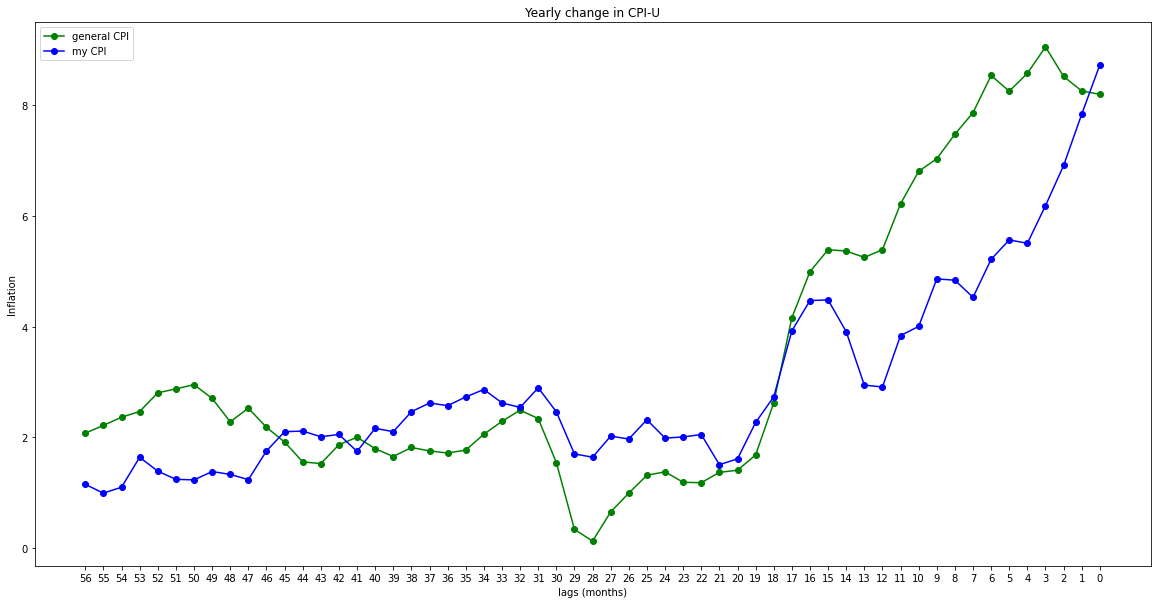

In [50]:
plt.figure(figsize = (20,10))

plt.plot(slags, changes, color='green', marker='o', linestyle='solid', label= "general CPI")
plt.plot(lags,myInflation, color='blue', marker='o', linestyle='solid', label = "my CPI")
plt.title("Yearly change in CPI-U")
plt.xlabel("lags (months)")
plt.ylabel("Inflation")
plt.legend()
plt.show()